In [20]:
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg (1).csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore


In [22]:
df = pd.read_csv('/content/auto-mpg.csv')

print(df.shape)
print(df.info())
print(df.head())
print(df.isnull().sum())
print("Duplicated rows:", df.duplicated().sum())


(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8    

In [23]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Convert 'horsepower' to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Clean column names
df.columns = df.columns.str.strip()


In [25]:
df = df[(np.abs(zscore(df['mpg'])) < 3)]

In [26]:
# Drop 'car name' column
df.drop(['car name'], axis=1, inplace=True)


In [27]:
df = pd.get_dummies(df, columns=['origin'], drop_first=True) #endoce origin


In [28]:
scaler = StandardScaler()
high_value_cols = ['displacement', 'horsepower', 'weight', 'acceleration']
df[high_value_cols] = scaler.fit_transform(df[high_value_cols])

In [29]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000
mean,23.445918,5.471939,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16,75.979592
std,7.805007,1.705783,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,3.683737
min,9.000000,3.000000,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,70.000000
25%,17.000000,4.000000,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,73.000000
50%,22.750000,4.000000,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,76.000000
75%,29.000000,8.000000,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,79.000000
max,46.600000,8.000000,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,82.000000


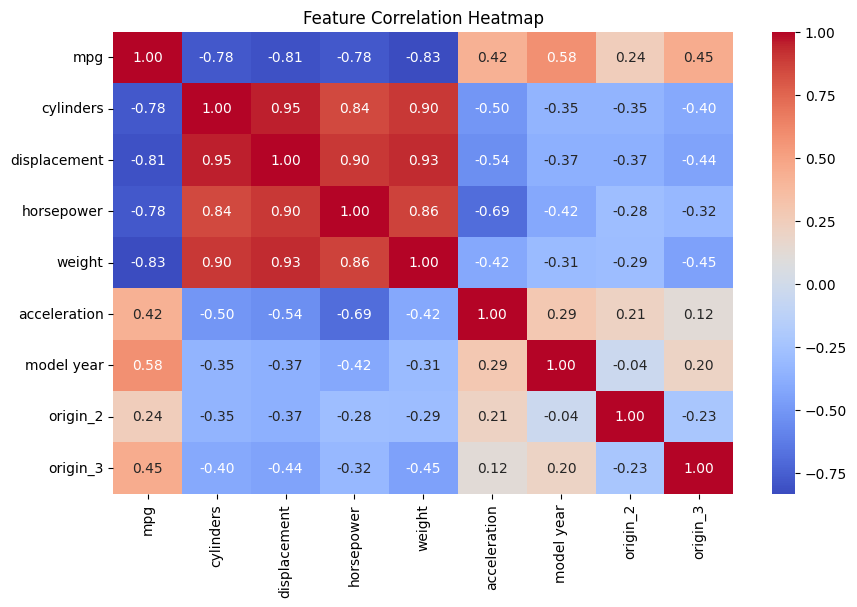

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [31]:

X = df.drop('mpg', axis=1)
y = df['mpg']


In [32]:
y_log = np.log1p(y)


In [38]:
X_train, X_test, y_train_log, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)



In [34]:
model = LinearRegression()
model.fit(X_train, y_train_log)

LinearRegression()

In [35]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)


In [36]:
mse = mean_squared_error(np.expm1(y_test), y_pred)
mae = mean_absolute_error(np.expm1(y_test), y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), y_pred)

print("MSE (log-transformed):", mse)
print("MAE (log-transformed):", mae)
print("RMSE (log-transformed):", rmse)
print("R² Score (log-transformed):", r2)

MSE (log-transformed): 10.49027972132566
MAE (log-transformed): 2.36201172344123
RMSE (log-transformed): 3.2388701303580634
R² Score (log-transformed): 0.8465901488337401


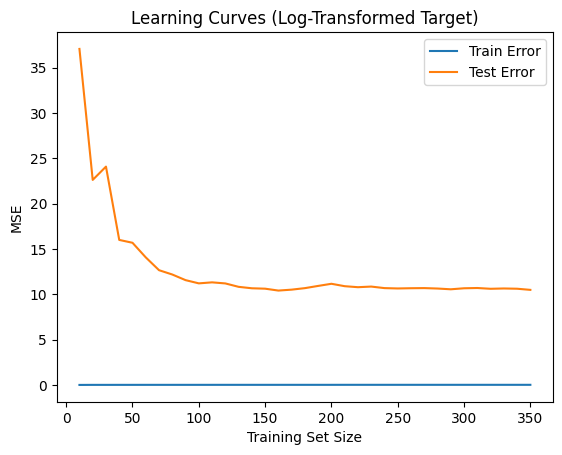

In [37]:
train_errors = []
test_errors = []
sizes = range(10, len(X_train), 10)

for size in sizes:
    model.fit(X_train[:size], y_train_log[:size])
    train_pred = model.predict(X_train[:size])
    test_pred_log = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train_log[:size], train_pred))
    test_errors.append(mean_squared_error(np.expm1(y_test), np.expm1(test_pred_log)))

plt.plot(sizes, train_errors, label='Train Error')
plt.plot(sizes, test_errors, label='Test Error')
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curves (Log-Transformed Target)")
plt.show()
